# Write a function to calculate gini index for the given dataset

x: list of counts
<br>
if we have 30 elements from one class, 40 elements from the second and 50 elements from third then x == [30,40,50]

calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. Smaller - better.
GI = 1- sum(p_i)^2

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
def gini(x:list):
    p=[]
    x_cum = np.sum(x)
    for i in range(len(x)):
        p_ = (x[i]/x_cum)**2
        p.append(p_)
    gini = 1 - np.sum(p)
    return round(gini,2) 

In [3]:
x=[30,40,50]
gini(x)

0.65

# Write a function to calculate gini index for the given split

x: list of counts for the left dataset 
<br>
y: list of counts for the right dataset

In [4]:
def split_gini(x:list, y:list): 
    x_=[]
    y_=[]
    total = len(x) + len(y)
    cum = np.sum(x)
    for i in range(len(x)):
        xi = (x[i]/cum)**2
        x_.append(xi)
    for j in range(len(y)):
        yi = (y[j]/cum)**2
        y_.append(yi)
    gini_x = 1 - np.sum(x_)
    gini_y = 1 - np.sum(y_)
    
    gini_weighted = (len(x)/total)*gini_x + (len(y)/total)*gini_y
    #return gini_x, gini_y, gini_weighted
    print('Gini for x split is: {:0.2f}. Gini for y split is: {:0.2f}. Weighted gini index is: {:0.2f}'.format(gini_x, gini_y, gini_weighted)) 

In [5]:
x = [40,20,30,15]
y = [90,10,5]
split_gini(x,y)

Gini for x split is: 0.72. Gini for y split is: 0.25. Weighted gini index is: 0.52


# Appply Decision Tree Classifier on the 'classification.csv' dataset from the previous homework.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('classification.csv')

In [4]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,college degree,17,12,176,9.3,11.359392,5.008608,1
1,27,no high school,10,6,31,17.3,1.362202,4.000798,0
2,40,no high school,15,14,55,5.5,0.856075,2.168925,0
3,41,no high school,15,14,120,2.9,2.658720,0.821280,0
4,24,high school,2,0,28,17.3,1.787436,3.056564,1


In [4]:
ed = pd.get_dummies(df.ed,prefix='ed')
df = df.join(ed)
df.drop('ed',axis=1,inplace=True)

In [5]:
y = df.default
X = df.drop('default',axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
clf = DecisionTreeClassifier()
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
kfold = KFold(n_splits=5, random_state=101)
grid = GridSearchCV(clf, params, n_jobs=-1, verbose=1,scoring='accuracy',cv=kfold)

In [8]:
grid_result = grid.fit(X_train, y_train)
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
print(grid.best_estimator_)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 1176 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed:   14.5s finished


Best: 0.7642857142857143 using {'max_leaf_nodes': 6, 'min_samples_split': 2}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [28]:
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report

In [22]:
clf = DecisionTreeClassifier(max_leaf_nodes=6,min_samples_split=2)
clf.fit(X_train,y_train,)
y_pred = clf.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
tree_accuracy = accuracy_score(y_test,y_pred)
print('RMSE is:{}, accuracy is:{}'.format(round(tree_rmse,2), tree_accuracy))

RMSE is:0.45, accuracy is:0.8


In [30]:
df.default.value_counts()

0    517
1    183
Name: default, dtype: int64

In [31]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[95  7]
 [21 17]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       102
           1       0.71      0.45      0.55        38

    accuracy                           0.80       140
   macro avg       0.76      0.69      0.71       140
weighted avg       0.79      0.80      0.78       140



In [77]:
import matplotlib.pyplot as plt
from sklearn import tree

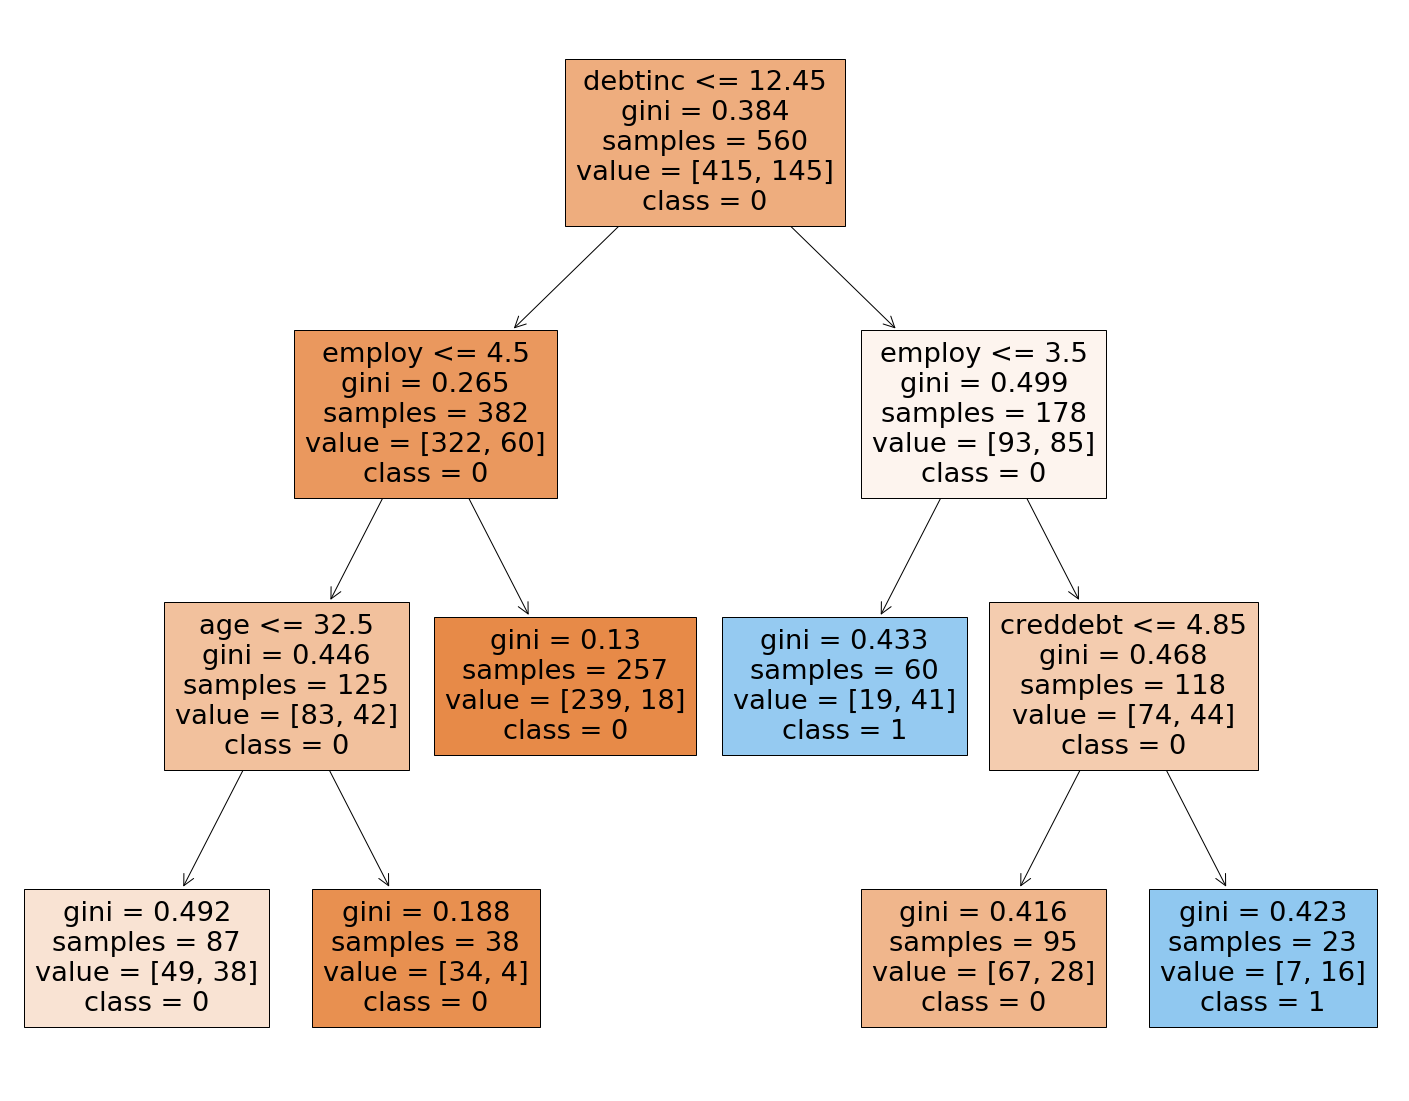

In [90]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names= list(X_test.columns),  
                   class_names=['0','1'],
                   filled=True)

# Implement Random Forest

In [ ]:
class RandomForest:
    def __init__(self,X,y)
    
    def fit(self):
        
    def predict(self, x):
        
    
    def score(self,y):
        ...